Adaboost Decision Stumps

In [30]:
import sys, itertools
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn, time, math
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import confusion_matrix

if '../tools' not in sys.path:
    sys.path.append('../tools')
from helper_functions import * 

import warnings
warnings.filterwarnings('ignore')

Using existing FVs


1000

In [31]:
trN = int(0.8 * N)
teN = N - trN
trX, trY = mfcc[:trN], labels[:trN]
teX, teY = mfcc[-teN:], labels[-teN:]
len(set(trY))

means = np.mean(trX, axis=0)
stddevs = np.std(trX, axis=0)

def summary(x):
    return '[{:.4f}, {:.4f}]'.format(np.ndarray.min(x), np.ndarray.max(x))
print('means in range', summary(means))
print('std in range', summary(stddevs))

# Whitened data
def adjust(x): return (x - means[None, :]) / stddevs[None, :]
trXadj = adjust(trX)
teXadj = adjust(teX)

print('norm. means in range', summary(np.mean(trXadj, axis=0)))
print('norm. std in range', summary(np.std(trXadj, axis=0)))
trX.shape

means in range [-0.0204, 0.0042]
std in range [0.0242, 0.0500]
norm. means in range [-0.0000, 0.0000]
norm. std in range [1.0000, 1.0000]


(800, 240)

numStumps 2, train data accuracy 0.1575, test accuracy 0.125


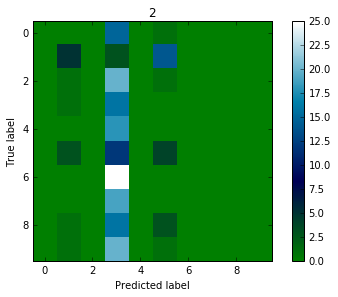

In [32]:
from sklearn.cross_validation import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.ocean):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


for n in [2]:
    numStumps = n
    stumps = AdaBoostClassifier(n_estimators=numStumps, base_estimator=DecisionTreeClassifier(max_depth=1))
    stumps.fit(trX, trY)

    print('numStumps {}, train data accuracy {}, test accuracy {}'.format(numStumps, stumps.score(trX, trY), stumps.score(teX, teY)))
    plot_confusion_matrix(confusion_matrix(teY, stumps.predict(teX)), title=str(n))

numStumps 10, train data accuracy 0.19875, test accuracy 0.19


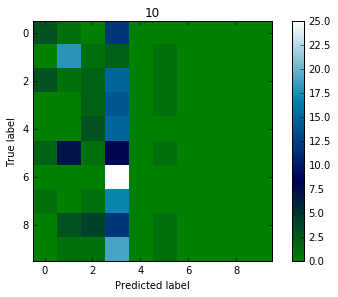

In [33]:
from sklearn.cross_validation import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.ocean):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


for n in [10]:
    numStumps = n
    stumps = AdaBoostClassifier(n_estimators=numStumps, base_estimator=DecisionTreeClassifier(max_depth=1))
    stumps.fit(trX, trY)

    print('numStumps {}, train data accuracy {}, test accuracy {}'.format(numStumps, stumps.score(trX, trY), stumps.score(teX, teY)))
    plot_confusion_matrix(confusion_matrix(teY, stumps.predict(teX)), title=str(n))


numStumps 50, train data accuracy 0.1825, test accuracy 0.15


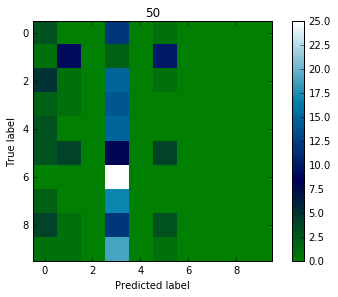

In [34]:
from sklearn.cross_validation import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.ocean):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


for n in [50]:
    numStumps = n
    stumps = AdaBoostClassifier(n_estimators=numStumps, base_estimator=DecisionTreeClassifier(max_depth=1))
    stumps.fit(trX, trY)

    print('numStumps {}, train data accuracy {}, test accuracy {}'.format(numStumps, stumps.score(trX, trY), stumps.score(teX, teY)))
    plot_confusion_matrix(confusion_matrix(teY, stumps.predict(teX)), title=str(n))


numStumps 500, train data accuracy 0.1825, test accuracy 0.15


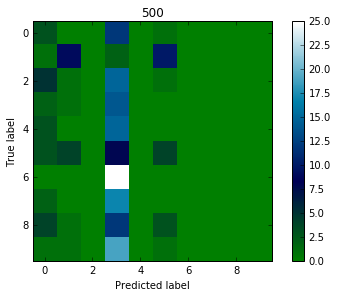

In [35]:
from sklearn.cross_validation import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.ocean):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


for n in [100]:
    numStumps = n
    stumps = AdaBoostClassifier(n_estimators=numStumps, base_estimator=DecisionTreeClassifier(max_depth=1))
    stumps.fit(trX, trY)

    print('numStumps {}, train data accuracy {}, test accuracy {}'.format(numStumps, stumps.score(trX, trY), stumps.score(teX, teY)))
    plot_confusion_matrix(confusion_matrix(teY, stumps.predict(teX)), title=str(n))
